In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://github.com/AIgineerAB/data_visualization_course/blob/main/exercises/data/Steam%20Top%20100%20Played%20Games%20-%20List.csv?raw=true')

In [4]:
df.head(10)

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
5,6,Grand Theft Auto V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/271590/Gran...,£14.80,"207,117","207,117","Open World, Action, Multiplayer, Crime, Mature"
6,7,NARAKA: BLADEPOINT,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1203220/NAR...,Free To Play,"201,876","208,643","Battle Royale, Multiplayer, Martial Arts, PvP,..."
7,8,Rust,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/252490/Rust...,£34.99,"168,002","205,358","Survival, Crafting, Multiplayer, Open World, O..."
8,9,Palworld,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1623730/Pal...,£24.99,"165,613","165,613","Open World, Survival, Creature Collector, Mult..."
9,10,Apex Legends™,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1172470/Ape...,Free To Play,"150,754","151,447","Free to Play, Battle Royale, Multiplayer, FPS,..."


In [5]:
print(df.dtypes)

Rank                int64
Name               object
Thumbnail URL      object
Store Link         object
Price              object
Current Players    object
Peak Today         object
Genre Tags         object
dtype: object


In [6]:
df['Current Players'] = pd.to_numeric(df['Current Players'].str.replace(',', ''), errors='coerce')



In [7]:
top10 = df[['Name', 'Current Players']].sort_values(by='Current Players', ascending=False).head(10).reset_index(drop=True)


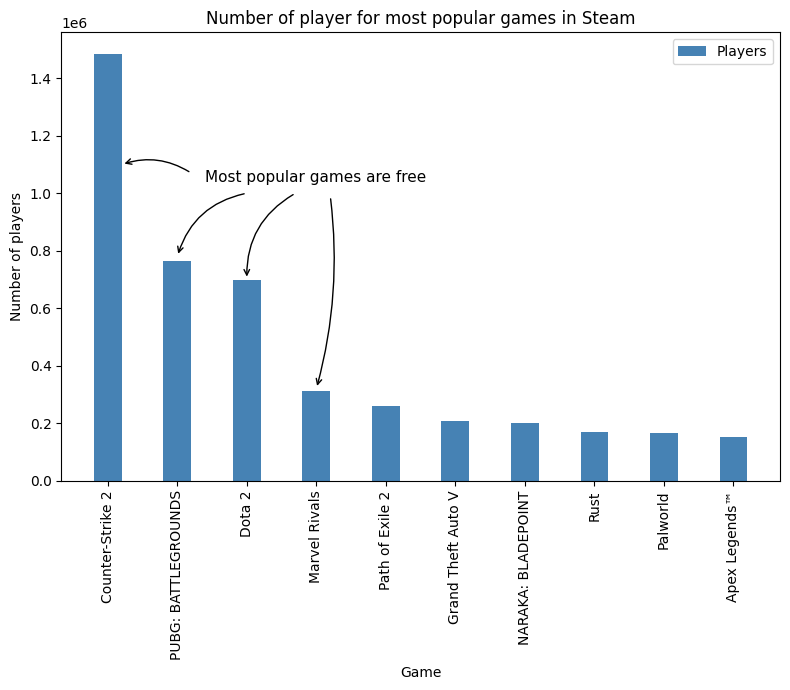

In [ ]:
def plot_top10_games():
    
    fig, ax1 = plt.subplots(figsize=(8, 7))
    ax.bar(top10['Name'], top10['Current Players'], color='steelblue',width=0.4, label='Players')
    ax.set_xlabel('Game')
    ax.set_ylabel('Number of players')
    ax.set_title('Number of player for most popular games in Steam')
    ax.legend()
    plt.xticks(rotation = 90)
    plt.tight_layout()
    
    arrowprops1= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad=0.3")
    arrowprops2= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad=0.3")
    arrowprops3= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad=0.24")
    arrowprops4= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad= -0.1")
    

# 1. Placera själva texten
    text_x, text_y = 1.4, 1040000
    ax.text(text_x, text_y, "Most popular games are free", fontsize=11)

    ax.annotate(
    text=None,
    xy=(2, 700000),                   # stapel 3
    xytext=(2.7, 1000024),  
    arrowprops=arrowprops1
)
    ax.annotate(
    text=None,
    xy=(1, 780000),                   # stapel 2
    xytext=(2, 1000024),  
    arrowprops=arrowprops2
)
    ax.annotate(
    text=None,
    xy=(.2, 1100000),                   # stapel 1
    xytext=(text_x - 0.2, text_y+30000),          
    arrowprops= arrowprops3
)
    ax.annotate(
    text=None,
    xy=(3 ,320000 ),
    xytext=(3.2, 990000),  # Stapel 4
    arrowprops=arrowprops4)
    plt.savefig('../plots/top10_games.png', dpi=300, bbox_inches='tight')
        
plot_top10_games()    
    

In [30]:
df['Price'] = df['Price'].fillna(0)
price_top10= df.head(10)

price_top10
df['Price']

0     Free To Play
1     Free To Play
2     Free To Play
3     Free To Play
4           £23.93
          ...     
95          £19.99
96           £7.19
97          £24.99
98          £15.99
99    Free To Play
Name: Price, Length: 100, dtype: object

In [ ]:
def clean_price(value):
    if isinstance(value, str) and value.startswith('£'):
        return float(value.replace('£', '').strip())
    return None  # Allt annat (t.ex. 'Free To Play') blir NaN

price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)

C:\Users\nirre\AppData\Local\Temp\ipykernel_19776\608170750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)


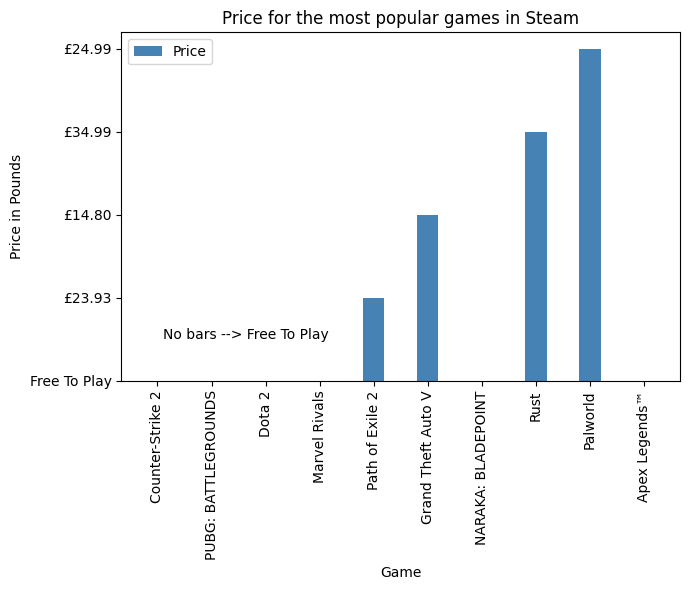

<Figure size 640x480 with 0 Axes>

In [32]:
# def plot_price_top10():
price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)
fig ,ax = plt.subplots(figsize=(7,6))
ax.bar(price_top10['Name'],price_top10['Price'],color= 'steelblue', width=0.4, label='Price')
ax.set_xlabel('Game')
ax.set_ylabel('Price in Pounds')
ax.set_title('Price for the most popular games in Steam')
ax.legend()
ax.annotate('No bars --> Free To Play',xy= (0.1,0.5))


plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
plt.savefig('../plots/price_top10.png', dpi=300, bbox_inches='tight')

    

In [21]:
df.columns

Index(['Rank', 'Name', 'Thumbnail URL', 'Store Link', 'Price',
       'Current Players', 'Peak Today', 'Genre Tags'],
      dtype='object')

C:\Users\nirre\AppData\Local\Temp\ipykernel_19776\3105733370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)


<module 'matplotlib.pyplot' from 'c:\\Users\\nirre\\OneDrive\\Skrivbord\\github_repos\\data_visualization\\data_visualization\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

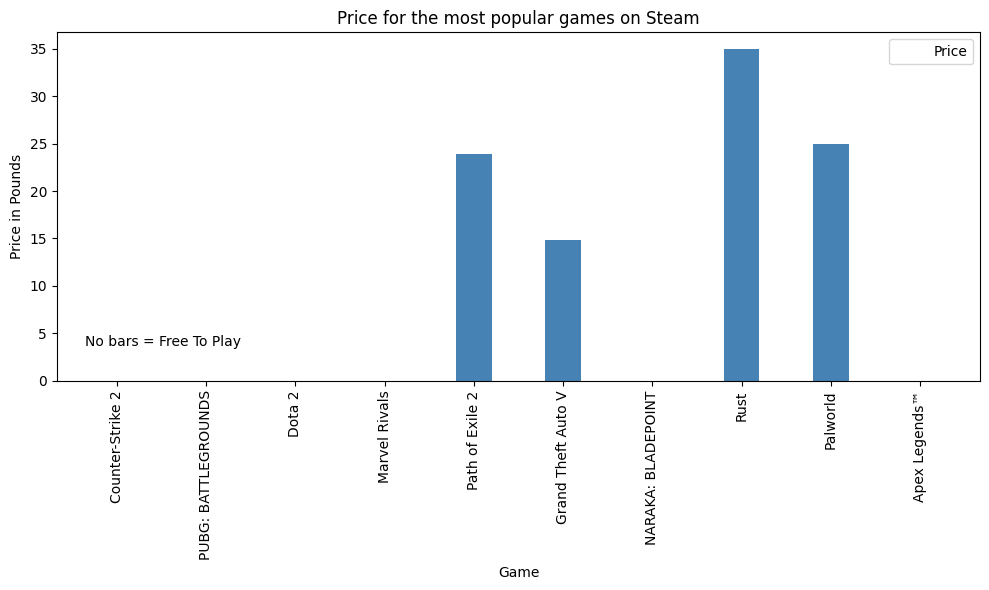

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Konvertera priser – Free To Play blir 0 istället för NaN
def clean_price(value):
    if isinstance(value, str) and value.startswith('£'):
        return float(value.replace('£', '').strip())
    return 0.0  # Free To Play = 0

price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)

# 2. Plotta med 0 i y-led för gratis-spel (de syns men har ingen bar)
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(price_top10['Name'], price_top10['Price_numeric'],
              color='steelblue', width=0.4, label='Price')

# 3. Ta bort staplar som är 0 i höjd (gör dem osynliga)
for bar, value in zip(bars, price_top10['Price_numeric']):
    if value == 0.0:
        bar.set_visible(False)

# 4. Resten som vanligt
ax.set_xlabel('Game')
ax.set_ylabel('Price in Pounds')
ax.set_title('Price for the most popular games on Steam')
ax.legend()
ax.annotate('No bars = Free To Play',
            xy=(0.03, 0.10), xycoords='axes fraction',
            fontsize=10, color='black')

# Dynamisk y-ticks
max_price = price_top10['Price_numeric'].max()
ax.set_yticks(range(0, int(max_price)+5, 5))

plt.xticks(rotation=90)
plt.tight_layout()
plt



C:\Users\nirre\AppData\Local\Temp\ipykernel_19776\3642642528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)


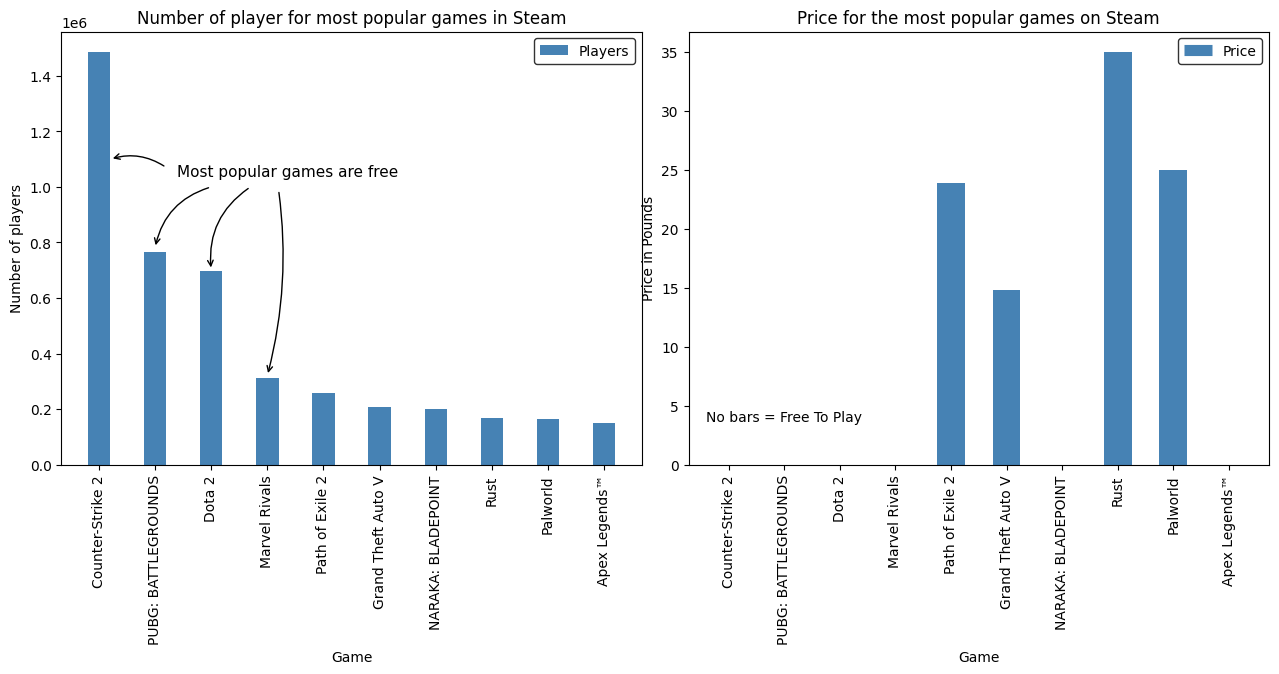

In [112]:
from matplotlib.lines import Line2D

price_top10['Price_numeric'] = price_top10['Price'].apply(clean_price)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13, 7))

ax1.bar(top10['Name'], top10['Current Players'], color='steelblue',width=0.4, label='Players')
ax1.set_xlabel('Game')
ax1.set_ylabel('Number of players')
ax1.set_title('Number of player for most popular games in Steam')
legend = ax1.legend()
legend.get_frame().set_edgecolor('black')
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
    
arrowprops1= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad=0.3")
arrowprops2= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad=0.3")
arrowprops3= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad=0.24")
arrowprops4= dict(arrowstyle="->", linewidth = 1, connectionstyle="arc3, rad= -0.1")


# 1. Placera själva texten
text_x, text_y = 1.4, 1040000
ax1.text(text_x, text_y, "Most popular games are free", fontsize=11)

ax1.annotate(
text=None,
xy=(2, 700000),                   # stapel 3
xytext=(2.7, 1000024),  
arrowprops=arrowprops1
)
ax1.annotate(
text=None,
xy=(1, 780000),                   # stapel 2
xytext=(2, 1000024),  
arrowprops=arrowprops2
)
ax1.annotate(
text=None,
xy=(.2, 1100000),                   # stapel 1
xytext=(text_x - 0.2, text_y+30000),          
arrowprops= arrowprops3
)
ax1.annotate(
text=None,
xy=(3 ,320000 ),
xytext=(3.2, 990000),  # Stapel 4
arrowprops=arrowprops4)
plt.savefig('../plots/top10_games.png', dpi=300, bbox_inches='tight')


bars = ax2.bar(price_top10['Name'], price_top10['Price_numeric'],
              color='steelblue', width=0.5, label='Price')

# 3. Ta bort staplar som är 0 i höjd (gör dem osynliga)
for bar, value in zip(bars, price_top10['Price_numeric']):
    if value == 0.0:
        bar.set_visible(False)

# 4. Resten som vanligt
ax2.set_xlabel('Game')
ax2.set_ylabel('Price in Pounds')
ax2.set_title('Price for the most popular games on Steam')
ax2.legend()
ax2.annotate('No bars = Free To Play',
            xy=(0.03, 0.10), xycoords='axes fraction',
            fontsize=10, color='black')
ax2.tick_params(axis='x', rotation=90)
# Dynamisk y-ticks
max_price = price_top10['Price_numeric'].max()
ax2.set_yticks(range(0, int(max_price)+5, 5))
# Skapa en anpassad legend med liten bar för 'Price'
custom_legend = [Line2D([0], [0], color='steelblue',lw = 7 ,label='Price')]

# Lägg till den anpassade legenden till ax2
custom_legend = [Line2D([0], [0], color='steelblue', lw=8, label='Price', solid_capstyle='butt')]
legend = ax2.legend(handles=custom_legend, loc='upper right')
legend.get_frame().set_edgecolor('black')